# <cite><font color="C32F23">Manipulation de fichiers et traitement de données sous Python</font></cite>

<div style="border:thin solid orange">
</div>

Carnus - K. Boudjelaba

Contact : <font size="4"><a href="mailto:k.boudjelaba@carnus.fr" class="button"><span class="delete">Mail</span></a></font>

Lien utile : <font size="4"><a href="https:www.carnus.fr" class="button"><span class="user">Lycée Charles Carnus</span></a></font>
   
<img src="LOGO.jpg"
     alt="Markdown Monster icon"
     style="float: right; margin-right: 380px;" 
     width=100cm  />

<div style="border:thin solid orange">
</div>


<div class="alert alert-block alert-info">
    
### Table des matières :

* <a href="#MF">Manipulation de fichiers </a> <br>
    * <a href="#FCSV">Fichiers CSV </a> <br>
        * <a href="#CEF">Création et écriture d'un fichier CSV </a> <br>
        * <a href="#ILF">Importation et lecture d'un fichier CSV </a> <br>
        * <a href="#EDRF">Exploitation des données récupérées du fichier CSV </a> <br>
    * <a href="#ILFT">Importation et lecture d'un fichier texte (.txt) </a> <br>
    * <a href="#EDFC">Exploitation des données fournies par un capteur </a> <br>
* <a href="#EX">Exercices </a> <br>
    * <a href="#EX1">Exercice 1 </a> <br>
    * <a href="#EX2">Exercice 2 </a> <br>
    * <a href="#EX3">Exercice 3 </a> <br>
</div>    
---

<a id="MF"></a>
## <cite><font color="C32F23"> Manipulation de fichiers : </font></cite>

<a id="FCSV"></a>
## <cite><font color="FBB903"> Fichiers CSV : </font></cite>

<div style="border:thin solid green">
</div>

<a id="CEF"></a>
### Création et écriture d'un fichier CSV :

<cite><font color="red"> Exemple 1 : </font></cite>

In [1]:
import csv # le module pour les fichiers csv

en_tetes = ['Composant','Valeur','Unité','Courant','Tension']
lignes = [('R', 1, 'kOhms', 0.02, 1.5),
        ('C', 5, 'uF', 0.005, 0.55),
        ('L', 2, 'mH', 0.001, 0.95),
        ]
with open('MonFichier.csv','w') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(en_tetes)
    f_csv.writerows(lignes)

Le fichier csv créé doit ressembler au tableau suivant :

| Composant | Valeur | Unité | Courant | Tension | 
|----------:|-------:|------:|--------:|--------:|  
| R         |   1    | kOhms |  0.02   |  1.5    |
| C         |   5    |  uf   |  0.005  |  0.55   |
| L         |   2    |  mH   |  0.001  |  0.95   |

<cite><font color="red"> Exemple 2 : </font></cite>

In [2]:
import csv

def ecritureCSV(fichier, sep, colonne1, colonne2):
    """
    fichier     <str> : Nom du fichier CSV à créer -> "MonFichier2.csv"
    sep         <str> : Séparateur de colonnes -> ";" pour notre cas
    colonne1    <int> : Première colonne
    colonne2    <int> : Deuxième colonne
    """
    with open('MonFichier2.csv','w') as f2:
        ecriture = csv.writer(f2, delimiter = sep)
        taille1, taille2 = len(colonne1), len(colonne2)
        if taille1 == taille2:
            ecriture.writerow(['t', 'f'])
            for i in range(taille1):
                ecriture.writerow((colonne1[i], colonne2[i]))
        else:
            print("Les tailles des listes sont différentes")
        f2.close()
    
# Declaration des listes
t = [0, 1, 2, 3, 4, 5]
f = [0.1, 0.4, 0.6, 0.9, 0.7, 0.5]
# Exécution de la fonction
ecritureCSV("MonFichier2.csv", ";", t, f)

Le fichier csv créé doit ressembler au tableau suivant :

|  t  |  f  |
|----:|----:|  
|  0  | 0.1 |
|  1  | 0.4 |
|  2  | 0.6 |
|  3  | 0.9 |
|  4  | 0.7 |
|  5  | 0.5 |

<a id="ILF"></a>
### Importation et lecture d'un fichier CSV :

Lectrure du fichier créé dans <cite><font color="red"> Exemple 2 : </font></cite>

In [3]:
import csv
file = open("MonFichier2.csv","r") # ouvrir le fichier
reader = csv.reader(file, delimiter = ";") # initialisation d’un lecteur de fichier
for row in reader : # parcours du lecteur avec une boucle
    print(row) # affichage ligne par ligne
file.close() # fermeture du fichier

['t', 'f']
['0', '0.1']
['1', '0.4']
['2', '0.6']
['3', '0.9']
['4', '0.7']
['5', '0.5']


Lecture du fichier créé dans <cite><font color="red"> Exemple 1 : </font></cite>

In [4]:
import csv
file = open("MonFichier.csv","r") # ouvrir le fichier
reader = csv.reader(file, delimiter = ",") # initialisation d’un lecteur de fichier
for row in reader : # parcours du lecteur avec une boucle
    print(row) # affichage ligne par ligne
file.close() # fermeture du fichier

['Composant', 'Valeur', 'Unité', 'Courant', 'Tension']
['R', '1', 'kOhms', '0.02', '1.5']
['C', '5', 'uF', '0.005', '0.55']
['L', '2', 'mH', '0.001', '0.95']


<a id="EDRF"></a>
### Exploitation des données récupérées du fichier CSV :

<p style='color:black; background-color:#FEE999; text-align:left'>
Ces données sont destinées à être traitées et tracées avec Python, mais :<br>
- On ramarque que chaque ligne du fichier CSV est placée dans une liste Python et que les valeurs d'une même grandeur (Tension par exemple) n'appartiennent pas à la même liste. <br>
- On remarque également que toutes les valeurs sont considérées comme des chaînes de caractères. <br>
Il est alors nécessaire d’écrire une fonction de lecture des fichiers CSV un peu plus évoluée afin de tenir compte des remarques précédentes. <br> 
</p>

<cite><font color="red"> Exemple 3 : </font></cite>

In [5]:
import csv

def lectureColCSV(fichier, sep, n) : 
    """ Pour les paramètres fichier et sep il faut les écrire entre les
    guillements car la fonction attend des chaines de caractères.
    fichier <str> : Le nom du fichier -> "MonFichier.csv"
    sep     <str> : Le séparateur de colonnes -> "," pour notre cas
    n       <int> : Le numéro de la colonne à lire
    """
    file = open( fichier, "r")
    reader = csv.reader(file, delimiter = sep)
    col = []
    for row in reader:
        """Dans notre cas le séparateur décimal est un "."
        Cette boucle n'est pas nécessaire
        Elle est nécessaire dans le cas où le séparateur
        décimal est "," """
        try:
            sep_decimal = row[n].replace(",", ".")
            col.append(float(sep_decimal))
        except:
            pass
    file.close()
    return col

# On récupère les deux dernières colonnes (4ème et 5ème) du fichier
# Rappel : Python commence l'indexation à O
x = lectureColCSV("MonFichier.csv", ",", 3)
y = lectureColCSV("MonFichier.csv", ",", 4)
print("Courant = ", x)
print("Tension = ", y)

Courant =  [0.02, 0.005, 0.001]
Tension =  [1.5, 0.55, 0.95]


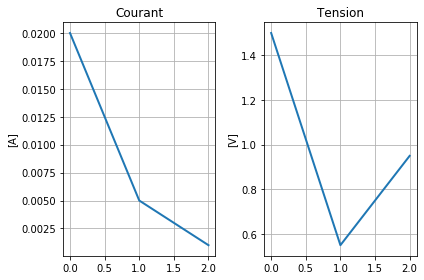

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(1, 2, 1)
plt.plot(x, '-', lw=2)

plt.ylabel('[A]')
plt.title('Courant')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(y, '-', lw=2)

plt.title('Tension')
plt.ylabel('[V]')
plt.grid(True)

plt.tight_layout()
plt.show()

<a id="ILFT"></a> 
## <cite><font color="#FBB903"> Importation et lecture d'un fichier texte (.txt) : </font></cite>

<div style="border:thin solid green">
</div>

In [7]:
Fichier = open('LtPy.txt','r')      # instanciation de l'objet Fichier de la classe file
# lecture dans le fichier avec la méthode read()
chaine = Fichier.read()
# affichage du contenu du fichier
print('Contenu du fichier :\n' + chaine)
# fermeture du fichier avec la méthode close()
Fichier.close()

Contenu du fichier :
time	V(cap)	V(source)
0.000000000000000e+00	0.000000e+00	0.000000e+00
9.142857087291697e-08	3.759883e-05	5.744954e-02
1.828571417458339e-07	1.353809e-04	1.148896e-01
2.742857126187509e-07	2.933463e-04	1.723202e-01
3.657142834916679e-07	5.114950e-04	2.297414e-01
4.571428543645849e-07	7.898270e-04	2.871531e-01
5.485714252375018e-07	1.128342e-03	3.445553e-01
6.399999961104186e-07	1.527041e-03	4.019481e-01
1.128281246110419e-06	4.350907e-03	7.081597e-01
1.616562496110419e-06	8.523312e-03	1.013732e+00
2.104843746110419e-06	1.416149e-02	1.318350e+00
2.593124996110419e-06	2.125295e-02	1.621728e+00
3.081406246110419e-06	2.978389e-02	1.923579e+00
3.569687496110419e-06	3.973915e-02	2.223619e+00
4.057968746110418e-06	5.110230e-02	2.521567e+00
4.546249996110419e-06	6.385560e-02	2.817142e+00
5.034531246110419e-06	7.798003e-02	3.110065e+00
5.522812496110420e-06	9.345536e-02	3.400062e+00
6.011093746110420e-06	1.102601e-01	3.686858e+00
6.499374996110420e-06	1.283714e-01	3.970184e+

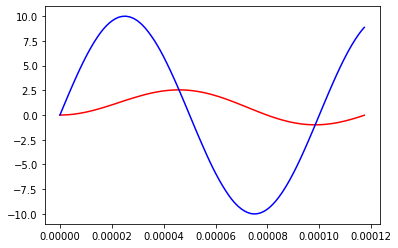

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Avec diese à l'entête (voir fichier créé)
data = np.loadtxt("LtPy2.txt")
plt.plot(data[:,0],data[:,1],"r-")
plt.plot(data[:,0],data[:,2],"b-")
plt.show()

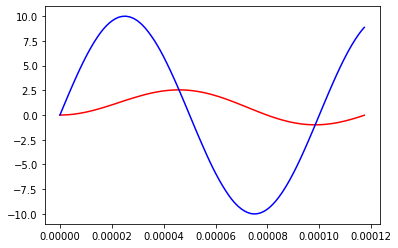

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Sans diese à l'entête (voir fichier créé)
f = open("LtPy.txt" , 'r')
f.readline() # lit la premiere ligne
data = np.loadtxt(f)
f.close()
plt.plot(data[:,0],data[:,1],"r-")
plt.plot(data[:,0],data[:,2],"b-")
plt.show()

<a id="EDFC"></a>
## <cite><font color="FBB903"> Exploitation des données fournies par un capteur : </font></cite>

<div style="border:thin solid green">
</div>

Un programme arduino récupère les données d'un capteur sous la forme suivante :

In [10]:
a1 = ['35\r\n','30\r\n','61\r\n','10\r\n','7\r\n','65\r\n','21\r\n','4\r\n','59\r\n']

In [11]:
type(a1)

list

On note que c'est une liste de chaîne de caractères. On ne doit garder que les nombres entiers.

In [12]:
x = []
for elt in a1: # elt va prendre les valeurs successives des éléments de ma_liste
    x.append(int(elt))
    print(elt)
print('x=',x)

35

30

61

10

7

65

21

4

59

x= [35, 30, 61, 10, 7, 65, 21, 4, 59]


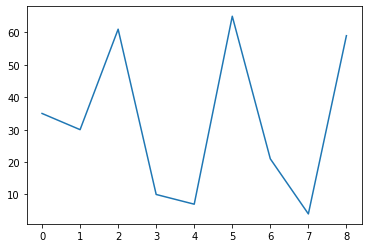

In [13]:
plt.plot(x);

In [14]:
a2 = '35\r\n','30\r\n','61\r\n','10\r\n','7\r\n','65\r\n','21\r\n','4\r\n','59\r\n'

In [15]:
type(a1)

list

In [16]:
type(a2)

tuple

In [17]:
a1 = ['35\r\n','30\r\n','61\r\n','10\r\n','7\r\n','65\r\n','21\r\n','4\r\n','59\r\n']
a3 = str(a1)
z1 = a3.replace('"', '')
z2 = z1.replace('\\r', '')
z3 = z2.replace('\\n', '')
print(z3)

['35', '30', '61', '10', '7', '65', '21', '4', '59']


<div style="border:thin solid green">
</div>

<a id="EX"></a>
## <cite><font color="C32F23"> Exercices : </font></cite>

---

<a id="EX1"></a>
## <cite><font color="FBB903"> Exercice 1 : </font></cite>

- Ecrire un programme pour créer le tableau csv suivant :

| Titre 1  | Titre 2  | Titre 3  |  
|----------|----------|----------|  
| Mot 1    |   0.1    |    4     |  
| Mot 2    |   0.2    |    10    |  
| Mot 3    |   0.3    |    5     | 
| Mot 4    |   0.6    |    7     |
| Mot 5    |   0.8    |    8     |

- Importer et lire le fichier créé, puis tracer la colonne "Titre 3" en focntion de la colonne "Titre 2"

<cite><font color="red"> Inscrire votre code dans la cellule ci-dessous : </font></cite>

---
<a id="EX2"></a>
## <cite><font color="FBB903"> Exercice 2 : </font></cite>

- Ecrire un programme pour lire le fichier "Donnees.csv" fourni en pièce jointe
- Afficher le contenu de ce fichier
- Tracer dans la même figure "G1" en fonction de "w" et "P1" en focntion de "w" (utiliser "subplot")
- Tracer dans la même figure "G2" en fonction de "w" et "P2" en focntion de "w"
- Tracer dans la même figure "G" en fonction de "w" et "P" en focntion de "w"

<cite><font color="red"> Inscrire votre code dans la cellule ci-dessous : </font></cite>

---
<a id="EX3"></a>
## <cite><font color="FBB903"> Exercice 3 : </font></cite>

- Ecrire un programme pour tracer la fonction suivante : $y(t)=2\sin(\omega t)$ avec $\omega=10$ et $t\in [0,1]$.
- Enregistrer les valeurs de $t$ et de $y$ dans un même fichier csv.

<cite><font color="red"> Inscrire votre code dans la cellule ci-dessous : </font></cite>